In [3]:
import matplotlib.pyplot as plt
import networkx as nx
from mpl_toolkits.axisartist.axislines import SubplotZero


def drawGraph(g):
    nodeOpt = {
        # 'node_color': 'blue',
        'pos': nx.drawing.nx_agraph.graphviz_layout(g, prog='dot'),
        # 'ax': ax,
        # 'node_size': 5000,
        'node_shape': "o",
        # 'clip_on': False,
        # 'Rotate': False,
        'font_family': 'humor sans'
    }
    arrowHeadOpt = {
        **nodeOpt,
        'width': 2,
        'arrowstyle': 'wedge',
        'arrowsize': 30,
    }
    arrowTailOpt = {
        **arrowHeadOpt,
        'arrowstyle': '-|>',
    }

    with plt.xkcd():
        fig, ax = plt.subplots(1)
        ax.axis('off')

        ax = SubplotZero(fig, 111)
        fig.add_subplot(ax)
        plt.xticks([])
        plt.yticks([])

        ax.set_ylabel('go up')
        ax.set_xlabel('go right')

        for s in ['right', 'top']:
            ax.axis[s].set_visible(False)

        for s in ['bottom', 'left']:
            ax.axis[s].set_axisline_style("->")

        # nx.drawing.draw_networkx_nodes(g, arrows=True, **options)
        nx.drawing.draw_networkx_labels(g, arrows=True, **nodeOpt)

        edges = g.edges.data()
        attrs = nx.get_edge_attributes(g, 'wedge')

        heads = [e for e in edges if ('wedge' in e[2])]
        nx.drawing.draw_networkx_edges(g, edgelist=heads, arrows=True, **arrowHeadOpt)

        tails = [e for e in edges if ('wedge' not in e[2])]
        nx.drawing.draw_networkx_edges(g, edgelist=tails, arrows=True, **arrowTailOpt)
        # nx.drawing.draw_networkx_edge_labels(
        #     G,
        #     edge_labels=nx.get_edge_attributes(G, 'label'),
        #     **options
        # )

# Generalizing Convolutions

## Glossary

- A monoid is anything compatible with MapReduce

```python
apple.merge(pen).merge(pineapple).merge(pen).merge(face).merge(palm) =
apple.merge(pen)                    # core 1
  .merge(pineapple.merge(pen))      # core 2
  .merge(face.merge(palm))          # core 3
```

## Glossary

- A group member is an invertible monoid

```python
pineapplepen.merge(-pen) = pineapple
```

A commutative (Abelian) monoid/group member is an monoid where order of reduce doesn't matter

```python
pineapple.merge(pen) = pen.merge(pineapple)
```

## Glossary

- Higher-order function (a.k.a. operator) is 
- Group action is an operator that is also a group member



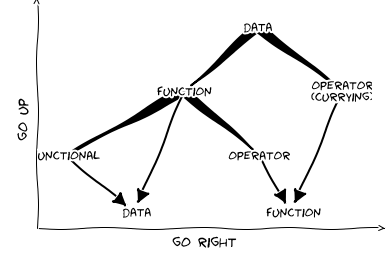

In [4]:


g = nx.DiGraph(directed=True)

n = 'data'
n2 = ' data'
f = 'function'
f2 = ' function'
o = 'operator'
c = 'operator\n(currying)'
fl = 'functional'

g.add_nodes_from([n])

g.add_nodes_from([f, fl, o, c])

g.add_nodes_from([n2, f2])

g.add_edge(n, f, wedge=True)
g.add_edge(f, n2)
g.add_edge(f, o, wedge=True)
g.add_edge(o, f2)
g.add_edge(f, fl, wedge=True)
g.add_edge(fl, n2)
g.add_edge(n, c, wedge=True)
g.add_edge(c, f2)

drawGraph(g)

plt.show()

## What is conv? (actually cross-correlation)

assuming f_1, f_2: (F = R^n => S)

defined for an operator A: F => F

conv(f_1, f_2)(A) = <f_1(x), A {f_2(x)}> dx: (F => F) => S

The common assumption is that operator A can be broken into left AL and right AR:

A {f(x)} = AL(f(AR(x)))

## How does it help? - Equivariance

... define equivariance

input f(x): (F = R^n => S) (can be a graph, use R^n for generalisability)
fully connected layer w(x, x+): R^n x R^n => S
morphing operator: A {f(x)} = AL(f(AR(x))): F => F

output g(x+): R^n => S = <f(x), w(x, x+)> dx

equivariant condition: <A {f(x)}, w(x, x+)> dx = Q {<f(x), w(x, x+)> dx}    \forall f(x)

assuming only AR is in consideration (e.g. a translation):

<f(AR x), w(x, x+)> dx = <f(x), w(x, QR x+))> dx

<f(x), w(AR^-1 x, x+)> dx = <f(x), w(x, QR x+))> dx     \forall f(x)

<f(x), w(AR^-1 x, QR^-1 y+)> dx = <f(x), w(x, y+))> dx     \forall f(x)

w(AR^-1 x, QR^-1 y+) = w(x, y+)

w(AR x, QR y+) = w(x, y+)

as a result:

assuming that x+ = H x, v(x) = w(H x, QH H x) = w(x, H x), then:

g(x+) = g(H x) = <f(x), w(x, H x)> dH =

assuming that x+ = Q x0, then

$$
g(x+) = g(Q x0) = <f(y), w(y, Q x0)> dy
    = <f(y), w(P^-1 y, x0)> dy
    = conv(f(y), w(y, x0))(P^-1)
$$

QED
